#  Part 1 - Test and Filter Outliers

In [1]:
# Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns


In [68]:
# ignoring warnings
import warnings
warnings.filterwarnings("ignore")


# 1. Dataset MSP Mandi

In [69]:
df= pd.read_csv("E:/Assignment/MSP_Mandi.csv")
df.head(15)

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1
5,MAIZE,2012,Kharif Crops,1175.0,1
6,Ragi_Maldandi,2012,Kharif Crops,1500.0,1
7,PIGEON PEA (TUR),2012,Kharif Crops,3850.0,1
8,SPILT GERRN GRAM,2012,Kharif Crops,4400.0,1
9,SPLIT BLACK GRAM,2012,Kharif Crops,4300.0,1


In [92]:
df.shape

(155, 5)

# Outlier Detection Function

In [70]:
# a function to find outliers on the basis of msprice in each crop category
m = list(df["Type"].unique())
def outliers(df):
    crop_category  = m 
    for x in crop_category:
        data = df[df['Type'] == x] # data of 1 type of crop among different crop categories
        num_eachcrop = len(data) # number of crops in each crop category
        Q1 = data["msprice"].quantile(0.25)  # 1st Quartile
        Q3 = data["msprice"].quantile(0.75) # 3rd Quartile
        IQR = Q3 - Q1  # Inter Quartile Range
        #print(IQR)
        lower_threshold = Q1 - 1.5*IQR
        upper_threshold = Q3 + 1.5*IQR
        data_clean = data[(data["msprice"] > lower_threshold) & (data["msprice"] < upper_threshold)] # process to Clean data
        Length_data_clean = len(data_clean)  # Length of Cleaned data
        if num_eachcrop != Length_data_clean:  # when outliers present
            print("There is Outlier in ",x)
        else: # no outlier present
            print("There is no Outlier in ",x)
        

In [80]:
# plot outliers in a commodity price for particular commodity 
def plot_outliers_commodity(df):
    cd = list(df["commodity"].unique())
    flag=0
    for commodity in cd:
        data = df[df['commodity'] == commodity] # to take one type of commodity in 1 time
        num_commodity = len(data)
        if num_commodity > 1:
            Q1 = data["msprice"].quantile(0.25)  
            Q3 = data["msprice"].quantile(0.75) 
            IQR = Q3 - Q1  
            #print(IQR)
            lower_threshold = Q1 - 1.5*IQR
            upper_threshold = Q3 + 1.5*IQR
            data_clean = data[(data["msprice"] > lower_threshold) & (data["msprice"] < upper_threshold)] 
            Length_data_clean = len(data_clean)
            if num_commodity != Length_data_clean: # means there is an outlier 
                flag = 1
                plt.figure(figsize=(6,4))
                plt.title(commodity)
                sns.boxplot(x="commodity", y="msprice",data=data_clean) #Boxplot
                sns.stripplot(x="commodity", y="msprice",data=data,
                                 jitter=False,marker='o',alpha=0.5,color='red')  # showing non compensated outliers
                patch_1 = mpatches.Patch(color='blue', label=commodity)
                patch_2 = mpatches.Patch(color='red',alpha=0.5,label='Data Points')
                plt.legend(handles=[patch_1,patch_2])
                plt.show()
    
    if flag==0:  # means no outlier
        print("No price outlier in ",df["Type"].iloc[0] )            
            
            
            
    

# Outlier Removal Function

In [93]:
def outlier_Removal(df): #Detecting Outlier according to the msprice of commodity and remove them
    data_Actual=pd.DataFrame() 
    cd = list(df["commodity"].unique())
    for commodity in cd:
        data=df[df["commodity"]==commodity]
        num_commodity = len(data)
        if num_commodity > 1:
            q1 = data["msprice"].quantile(0.25)
            q3 = data["msprice"].quantile(0.75)
            iqr = q3-q1 #Interquartile range
            lower_threshold  = q1-1.5*iqr
            upper_threshold = q3+1.5*iqr
            data = data.loc[(data['msprice'] > lower_threshold) & (data['msprice'] < upper_threshold)]
            data.sort_values("year",inplace=True)
            
        data_Actual=pd.concat([data_Actual,data])
        data_Actual.reset_index(drop=True,inplace=True)
    return data_Actual

# Visualiztion using Boxplots

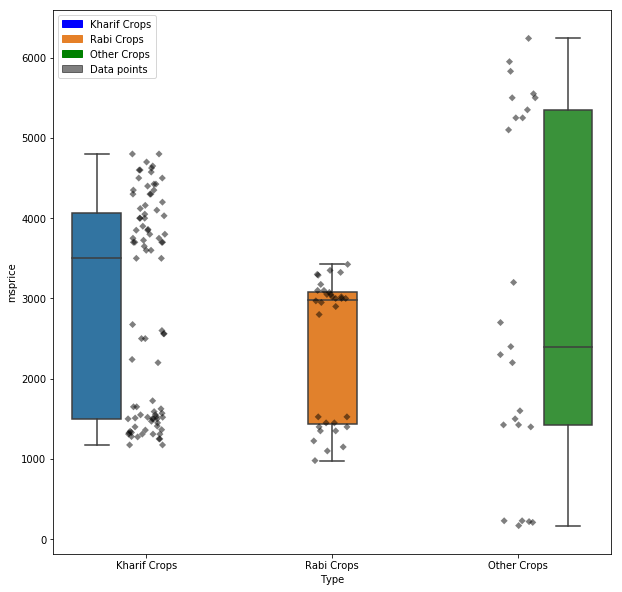

In [82]:
plt.figure(figsize=(10,10))
sns.boxplot(x="Type", y="msprice",hue='Type',data=df) #box plot
sns.stripplot(y='msprice', x='Type',data=df,jitter=True,marker='D',alpha=0.5,color='black') # non compensated outliers
patch_1 = mpatches.Patch(color='blue', label='Kharif Crops')
patch_2 = mpatches.Patch(color='#E58028', label='Rabi Crops')
patch_3 = mpatches.Patch(color='green', label='Other Crops')
patch_4= mpatches.Patch(color='black', label='Data points',alpha=0.5)
plt.legend(handles=[patch_1,patch_2,patch_3,patch_4])
plt.show()

# Finding Outlier Category wise

In [83]:
outliers(df)

There is Outlier in  Kharif Crops
There is Outlier in  Rabi Crops
There is no Outlier in  Other Crops


# Outliers in case of kharif Crops

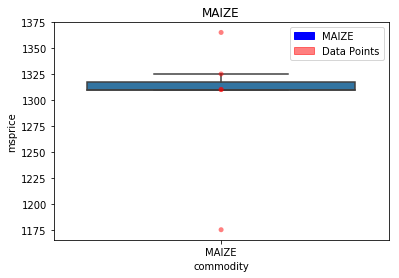

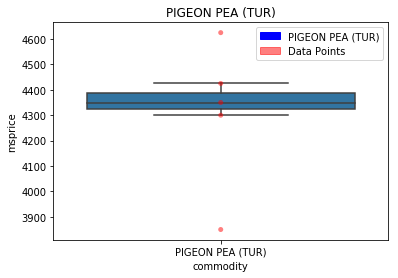

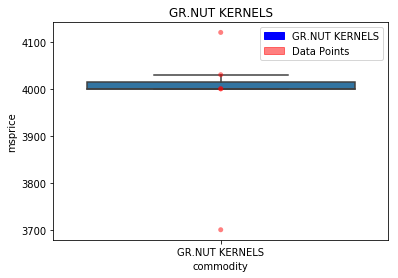

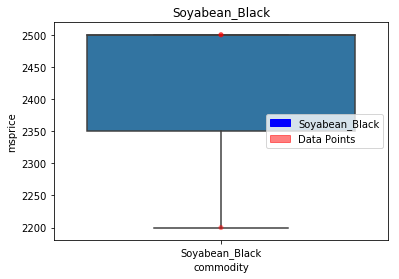

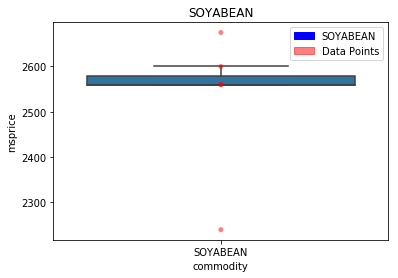

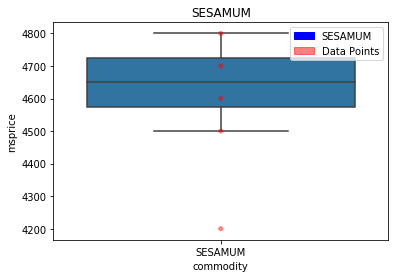

In [84]:
plot_outliers_commodity(df[df["Type"]=="Kharif Crops"])

# Outliers in case of Rabi Crops

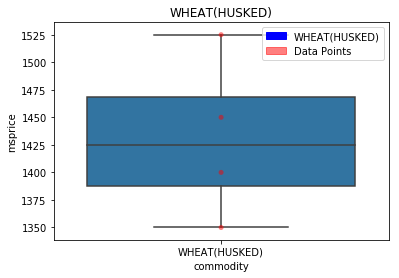

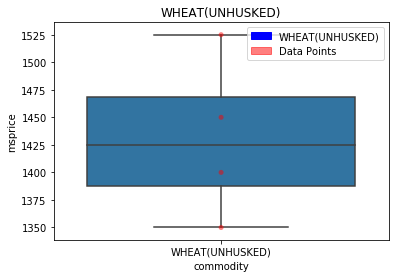

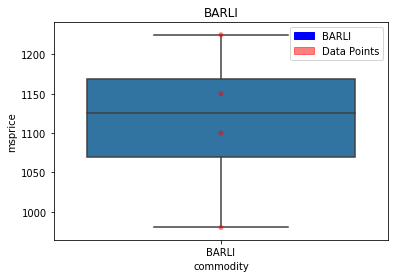

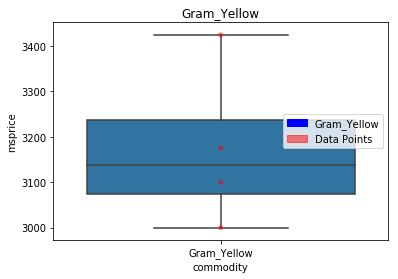

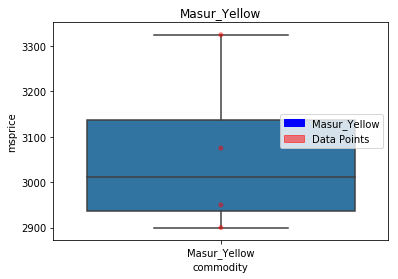

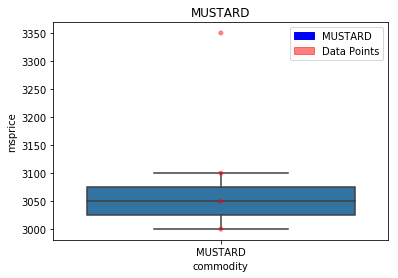

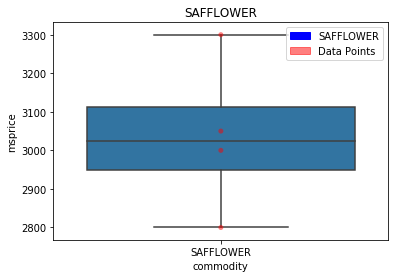

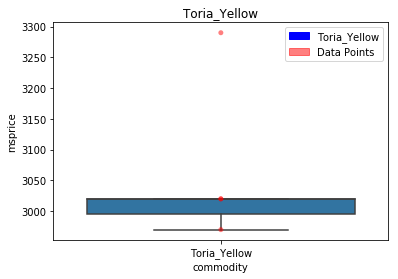

In [85]:
plot_outliers_commodity(df[df["Type"]=="Rabi Crops"])

# Outliers in case of Other Crops

In [86]:
plot_outliers_commodity(df[df["Type"]=="Other Crops"])

No price outlier in  Other Crops


# Saving data after removing outliers in csv format

In [95]:
data_no_outliers=outlier_Removal(df)
data_no_outliers.to_csv("MSP_MANDI_NO_OUTLIER_DATA.csv",index=False)

# 2. Dataset Monthly Data

In [96]:
# find outlier in accordance to the price of commodity and remove it
def outlier_removal(df):
    data_imp = pd.DataFrame()
    cd = list(df['Commodity'].unique())
    for commodity in cd:
        data = df[df['Commodity'] == commodity]
        count_commodity = len(data)
        if count_commodity > 1:
            Q1 = data["modal_price"].quantile(0.25)
            Q3 = data["modal_price"].quantile(0.75)
            IQR = Q3 - Q1
            L_threshold = Q1 - 1.5*IQR
            U_threshold = Q3 + 1.5*IQR
            Clean_value = [U_threshold if y > U_threshold else y for y in data['modal_price'].tolist()]
            Clean_value = [L_threshold if y < L_threshold else y for y in Clean_value]
            data['modal_price'] = Clean_value
            data.sort_values("date",inplace=True)
            
        data = pd.concat([data_imp,data])
        data.reset_index(drop=True,inplace=True)
        
    return data

In [97]:
# plotting outlier in a particular type
def plot_outliers_commodity(df):
    cd = list(df["commodity"].unique())
    flag=0
    for commodity in cd:
        data = df[df['commodity'] == commodity] # to take one type of commodity in 1 time
        num_commodity = len(data)
        if num_commodity > 1:
            Q1 = data["modal_price"].quantile(0.25)  
            Q3 = data["modal_price"].quantile(0.75) 
            IQR = Q3 - Q1  
            #print(IQR)
            lower_threshold = Q1 - 1.5*IQR
            upper_threshold = Q3 + 1.5*IQR
            data_clean = data[(data["modal_price"] > lower_threshold) & (data["modal_price"] < upper_threshold)] 
            Length_data_clean = len(data_clean)
            if num_commodity != Length_data_clean: # means there is an outlier 
                flag = 1
                plt.figure(figsize=(6,4))
                plt.title(commodity)
                sns.boxplot(x="Commodity", y="modal_price",data=data_clean) #Boxplot
                sns.stripplot(x="Commodity", y="modal_price",data=data,
                                 jitter=False,marker='o',alpha=0.5,color='red')  # showing non compensated outliers
                patch_1 = mpatches.Patch(color='blue', label=commodity)
                patch_2 = mpatches.Patch(color='red',alpha=0.5,label='Data Points')
                plt.legend(handles=[patch_1,patch_2])
                plt.show()
    
    if flag==0:  # means no outlier
        print("No price outliers are there" )            
            
            

In [5]:
df = pd.read_csv("E:/Assignment/Monthly_data.csv")
df.head(15)

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra
5,Ahmednagar,Sorgum(Jawar),2016,April,2093,1695,2454,2119,2016-04,Ahmadnagar,Maharashtra
6,Ahmednagar,Maize,2015,April,75,1345,1401,1373,2015-04,Ahmadnagar,Maharashtra
7,Ahmednagar,Maize,2016,April,155,1367,1392,1375,2016-04,Ahmadnagar,Maharashtra
8,Ahmednagar,Gram,2015,April,1794,3533,3762,3647,2015-04,Ahmadnagar,Maharashtra
9,Ahmednagar,Gram,2016,April,630,4790,5553,5216,2016-04,Ahmadnagar,Maharashtra


In [6]:
df.shape # raw data

(62429, 11)

In [101]:
df = pd.read_csv("E:/Assignment/Monthly_data.csv")
df["Commodity"]=df["Commodity"].apply( lambda y : y.lower()) # applying lambda function to make all comodities name in lowercase
df=df[df["modal_price"]!=0] # selecting with model price not equal to 0
df["date"]=pd.to_datetime(df["date"]) # changing it into time series format

In [102]:
df.shape

(62225, 11)

# There are 349 APMC in Monthly Data

# Outlier Visualization in each APMC and in each Cluster

In [112]:
apmc = input('Enter APMC: ') # enter any APMC
comm = input('Enter Commodity within that APMC: ') # enter any commodity name

df_temp = df[df['APMC'] == apmc]
df_temp = df_temp[df['Commodity'] == comm]

plot_price_outliers(df_temp)

Enter APMC: Ahmednagar
Enter Commodity within that APMC: bajri
No modal price outliers found


# Removing outliers and saving it in csv format

In [114]:
df_Cleaned=pd.DataFrame()
for apmc in df["APMC"].unique().tolist():
    df_temp=df[df["APMC"]==apmc]
    data=remove_outlier(df_temp)
    df_Cleaned=pd.concat([df_Cleaned,data])
    
df_Cleaned.shape

(62225, 11)

In [116]:
df_Cleaned.reset_index(drop=True,inplace=True)
df_Cleaned.to_csv("Monthly_data_no_outliers.csv",index=False)